In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
#Functions

def cross_entropy_l1(y, p, w, lmbda, N):
    return cross_entropy(y, p) + (lmbda/N)*np.sum(np.abs(w))

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def classification_rate(y, p):
    return np.mean(y == np.round(p))

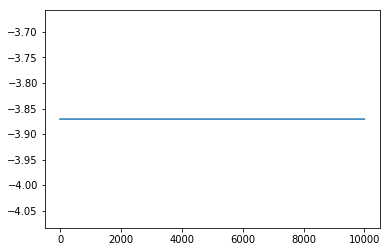

In [95]:
# Fit unregularized model

w = np.random.randn(D+1)

J = []
eta = 1e-40
epochs = int(1e4)

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta * (1/N) * PHI.T.dot(p-y)
    
#plt.figure(figsize = (12,9))
plt.plot(J)

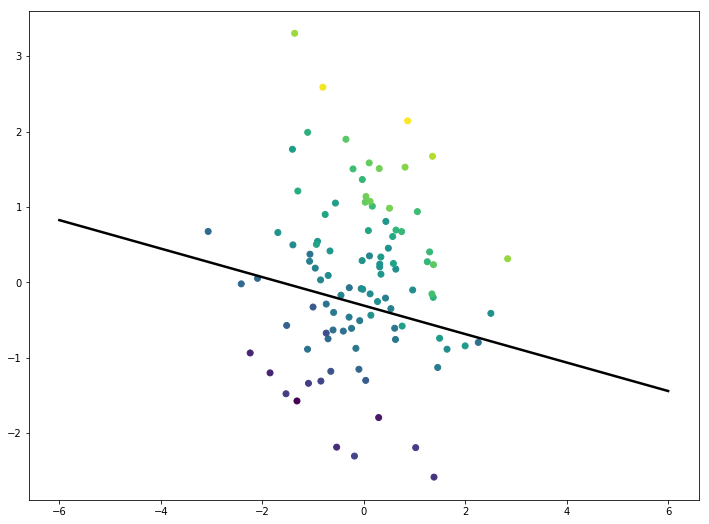

In [96]:
# Visualize unregularized decision boundary

dx1 = np.linspace(-6, 6, 10)
dx2 = -(w[0]/w[2]) - (w[1]/w[2])*dx1

plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(dx1, dx2, color = "black", linewidth = 2.5)

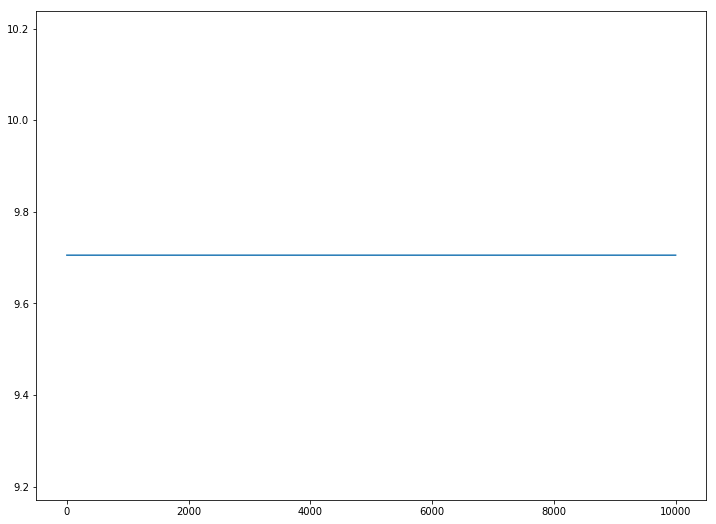

In [97]:
w_l2 = np.random.randn(D+1)

J = []
eta = 5e-1
epochs = int(1e4)
lmbda = 5

for t in range(epochs):
    p_l2 = sigmoid(PHI.dot(w_l2))
    J.append(cross_entropy_l1(y, p_l2, w_l2, lmbda, N))
    w -= eta * (1/N) * (PHI.T.dot(p - y) + lmbda*np.sign(w))
    
plt.figure(figsize = (12,9))
plt.plot(J)

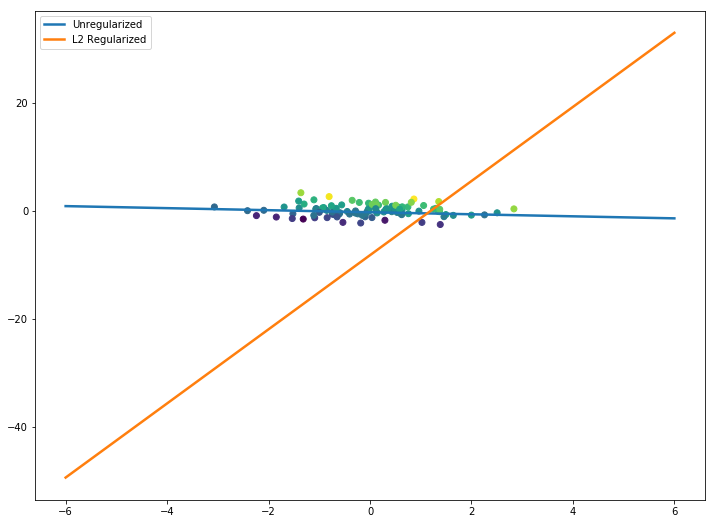

In [99]:
# Visualize regularized decision boundary

dx1_l2 = np.linspace(-6, 6, 10)
dx2_l2 = -(w_l2[0]/w_l2[2]) - (w_l2[1]/w_l2[2])*dx1_l2

plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(dx1, dx2, label = "Unregularized", linewidth = 2.5)
plt.plot(dx1_l2, dx2_l2, label = "L2 Regularized", linewidth = 2.5)
plt.legend()

In [ ]:
print("Unregularized Classification Rate: {}".format(classification_rate(y, p)))
print("L2 Classification Rate: {}".format(classification_rate(y, p_l2)))